In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [46]:
# Função para calcular e exibir a matriz de confusão
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
    return cm

In [47]:
# Função para calcular métricas de avaliação
def calcular_metricas(cm):
    VP = np.diag(cm)                 # Verdadeiros Positivos
    FP = np.sum(cm, axis=0) - VP     # Falsos Positivos
    FN = np.sum(cm, axis=1) - VP     # Falsos Negativos
    VN = np.sum(cm) - (VP + FP + FN) # Verdadeiros Negativos

    acuracia = (VP + VN) / np.sum(cm)
    precisao = VP / (VP + FP)
    recall = VP / (VP + FN)
    especificidade = VN / (FP + VN)
    fscore = 2 * (precisao * recall) / (precisao + recall)

    print(f"Acurácia: {np.mean(acuracia):.2f}")
    print(f"Precisão: {np.mean(precisao):.2f}")
    print(f"Sensibilidade (Recall): {np.mean(recall):.2f}")
    print(f"Especificidade: {np.mean(especificidade):.2f}")
    print(f"F-score: {np.mean(fscore):.2f}")

In [48]:
# Gerar dados realistas (80% de acertos)
np.random.seed(42)
num_classes = 10
num_samples = 100

y_true = np.random.randint(0, num_classes, num_samples)
y_pred = y_true.copy()

# Adicionar ruído de 20% (erros aleatórios)
num_errors = int(0.2 * num_samples)
error_indices = np.random.choice(num_samples, num_errors, replace=False)
y_pred[error_indices] = np.random.randint(0, num_classes, num_errors)

labels = [f'Classe {i}' for i in range(num_classes)]

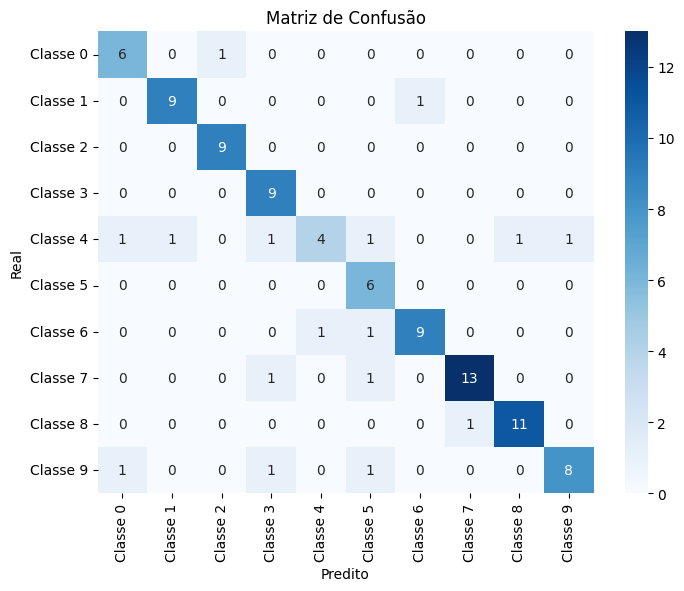

In [49]:
# Plotar matriz de confusão
cm = plot_confusion_matrix(y_true, y_pred, labels)

In [50]:
# Calcular métricas
print('*** Métricas de Avaliação ***')
calcular_metricas(cm)

*** Métricas de Avaliação ***
Acurácia: 0.97
Precisão: 0.83
Sensibilidade (Recall): 0.85
Especificidade: 0.98
F-score: 0.83
